## PROJECT TITLE : Analysis and Prediction of housing dataset to predict house rent price using multiple linear regression algorithm.

### Task 1) Gathering the dataset, Cleaning and Data Preprocessing
### Task 2) Selection of particular Algorithm 1) Evaluate the model to achieve Maximim Accuracy.

In [ ]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# convert categorical features to numerical
df['mainroad'] = df['mainroad'].map({'yes':1,'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})
df = pd.get_dummies(df,columns=['furnishingstatus'], drop_first=True)

In [ ]:
# selecting the target and features

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

In [ ]:
print(X.shape)
print(y.shape)

(545, 5)
(545,)


In [ ]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
import sklearn.linear_model as linear_model

# Ensure this import is present in the current cell before using LinearRegression
from sklearn.linear_model import LinearRegression # Importing the LinearRegression class

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict the test
y_pred = model.predict(X_test)

# calculate the mean squared error and r-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(y_pred)

[6178627.50326817 6370140.85865473 3283148.1570249  4226007.94816032
 3409685.55116741 4262158.3499693  5493440.53152357 5559897.74293016
 3373715.42245305 3020513.18649699 9519985.01490602 3250408.25967961
 3184310.73107686 3639160.7315938  3907874.98339005 6174323.64572264
 3148160.32926787 4872535.73454622 4826205.69113307 3888527.39095668
 5222386.81260559 4294589.38035851 3162381.17719464 4193028.43115341
 5747707.28367817 7619041.42465273 2989724.54874164 4794005.74968623
 7434038.64867549 3457027.28535551 5102872.70577387 3982998.90101381
 6215707.38061091 4724828.08224186 4307759.63367012 5625853.70972471
 4791990.70630181 3815116.83871033 3261429.41224535 4879463.83866908
 5326652.37523625 3156512.70502897 6345431.50216772 4316575.21358846
 4120177.60802241 4190668.52130486 6710808.14327267 4603723.42489655
 4521704.65093634 3637248.18329027 7841708.56409846 3299587.35299201
 4772882.73353006 4071574.4701165  3957195.63851065 3085375.24727539
 6971252.23454902 3422953.86233245

In [ ]:
print(f"Mean Squared error: {mse}")
print(f"R-squared: {r2}")

Mean Squared error: 2292721545725.3623
R-squared: 0.5464062355495871


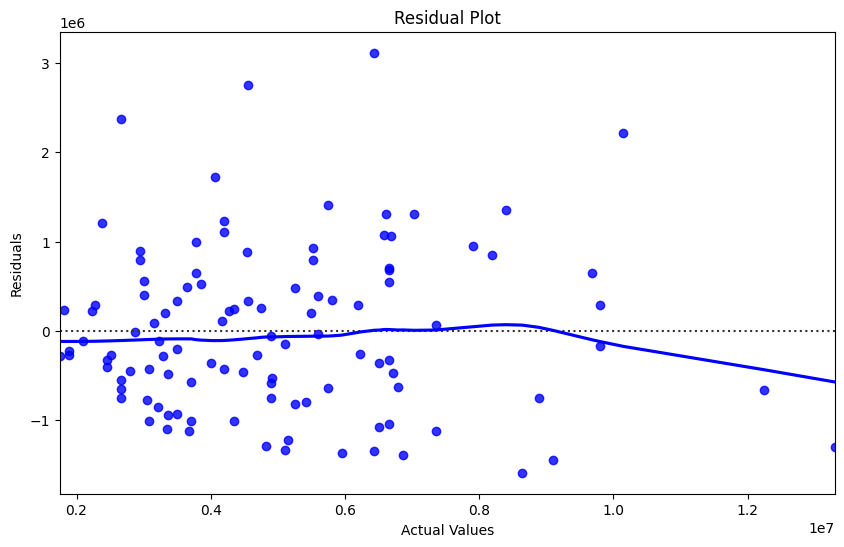

In [ ]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

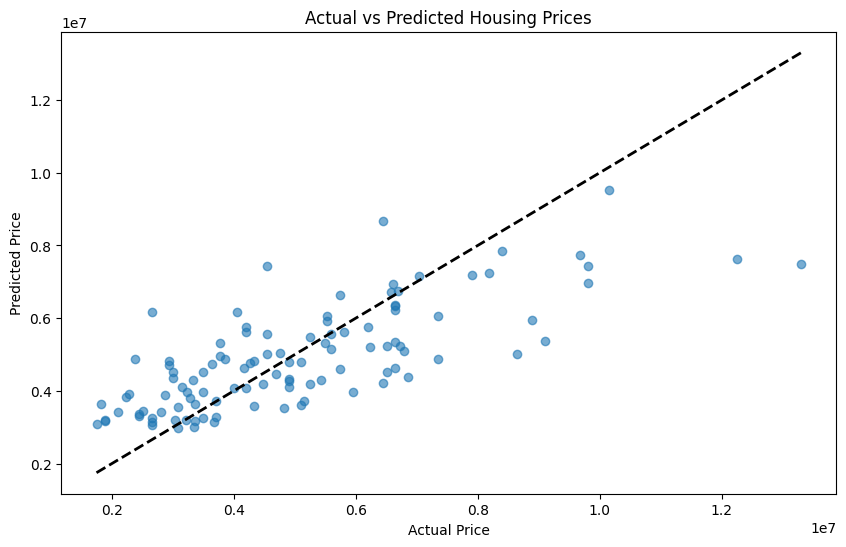

In [ ]:
# scatter plot of actual vs prediction price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

In [ ]:
# Take user input for prediction
area = float(input("Enter the area of the house: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
parking = int(input("Enter the number of parking spaces: "))

# create a dataframe for prediction
user_data = pd.DataFrame([[area,bedrooms,bathrooms,stories,parking]], columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])
# Predict price
predicted_price = model.predict(user_data)
print(f"The predicted price for the given input is: {predicted_price[0]}")

Enter the area of the house: 1250
Enter the number of bedrooms: 5
Enter the number of bathrooms: 2
Enter the number of stories: 2
Enter the number of parking spaces: 250
The predicted price for the given input is: 88971189.65235654
